In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/mcdonalds.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.shape

(1453, 15)

In [ ]:
# Describe the dataset
df.describe(include='all')


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


In [ ]:
duplicates = df.duplicated().sum()
print(f'Dataset has {duplicates} ({duplicates / len(df) * 100:.1f}%) duplicate rows')


Dataset has 22 (1.5%) duplicate rows


In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicates_after_drop = df.duplicated().sum()
print(f'Dataset has {duplicates_after_drop} duplicate rows after removing duplicates.')

Dataset has 0 duplicate rows after removing duplicates.


In [ ]:
df.shape

(1431, 15)

In [ ]:
# Calculate the correlation matrix, only including numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Identify highly correlated features (absolute correlation > 0.8 for this example)
high_correlations = correlation_matrix[(correlation_matrix > 0) & (correlation_matrix != 1)].stack().reset_index()
high_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_correlations)

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [ ]:
# Define a function to check for imbalance
def check_imbalance(column, threshold=0.5):
    counts = df[column].value_counts(normalize=True)
    return counts.max() > threshold

# Identify imbalanced features
imbalanced_features = [col for col in df.columns if check_imbalance(col)]
print(f'Imbalanced features: {imbalanced_features}')


Imbalanced features: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']


Using Visualisations to Describe Market Segments:

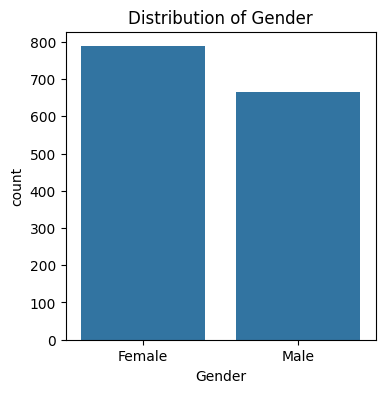

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of nominal and ordinal variables
nominal_ordinal_vars = ['Gender']

for var in nominal_ordinal_vars:
    plt.figure(figsize=(4,4))
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.show()


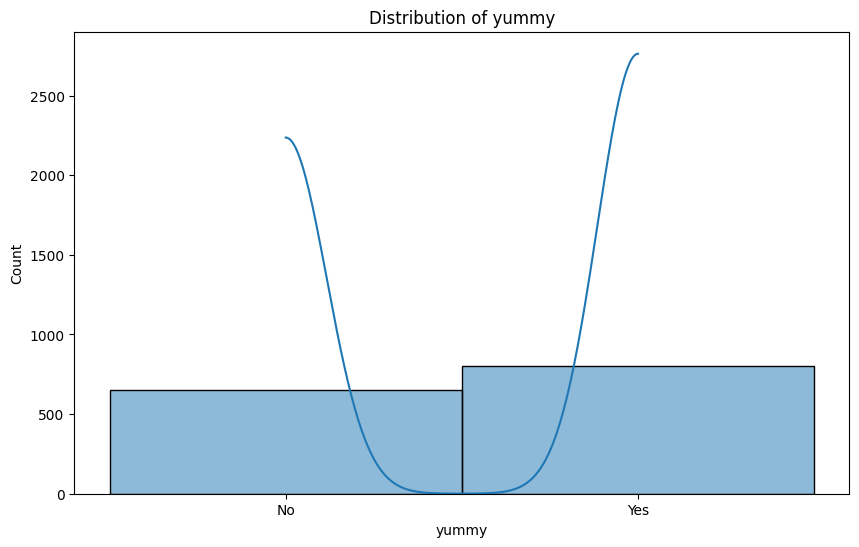

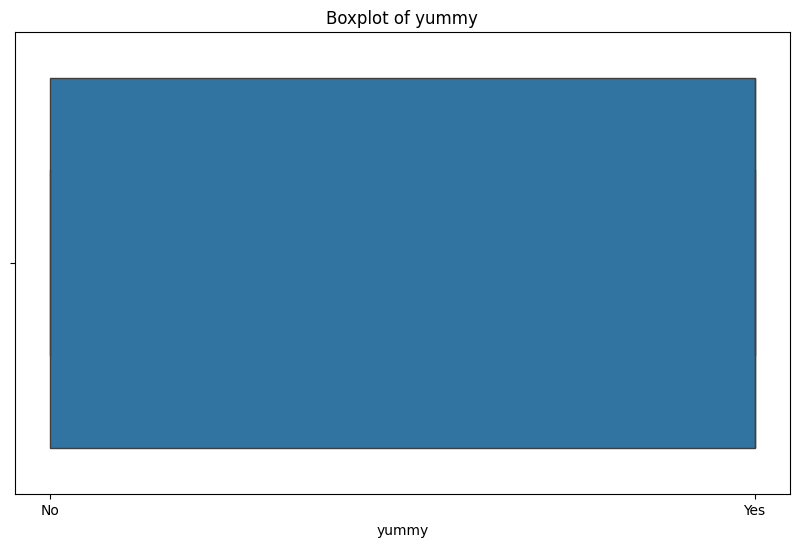

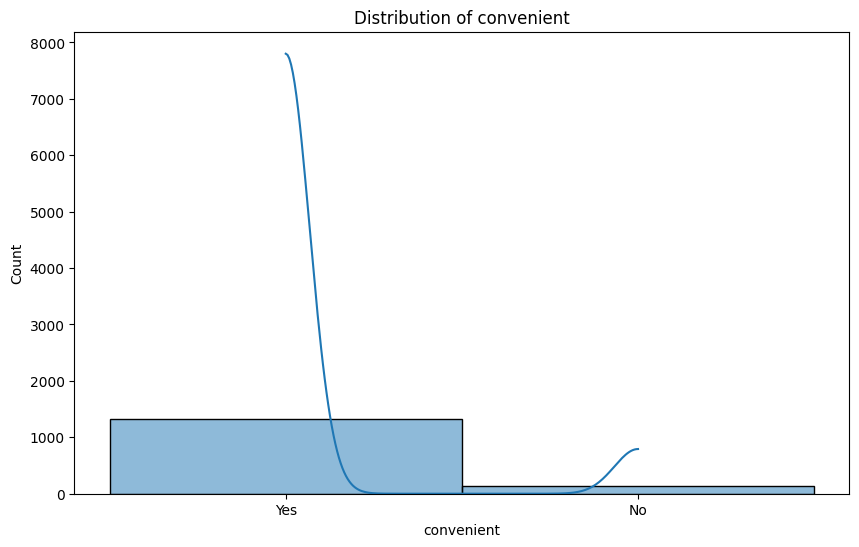

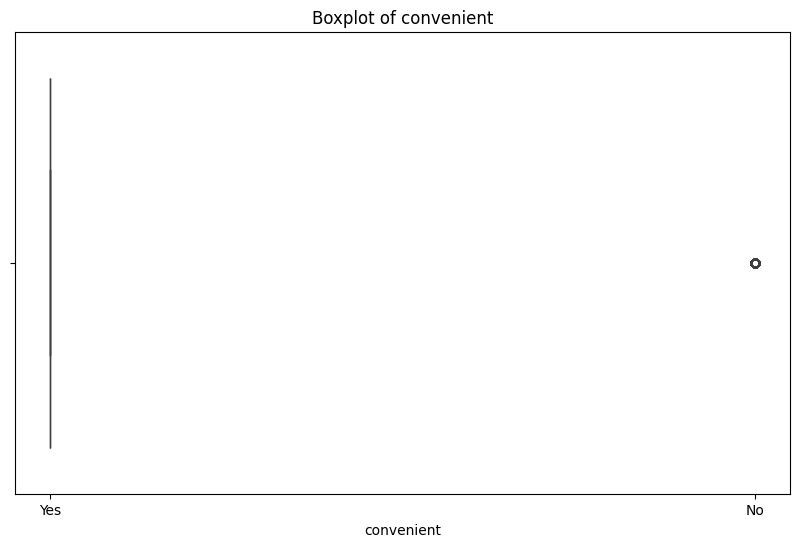

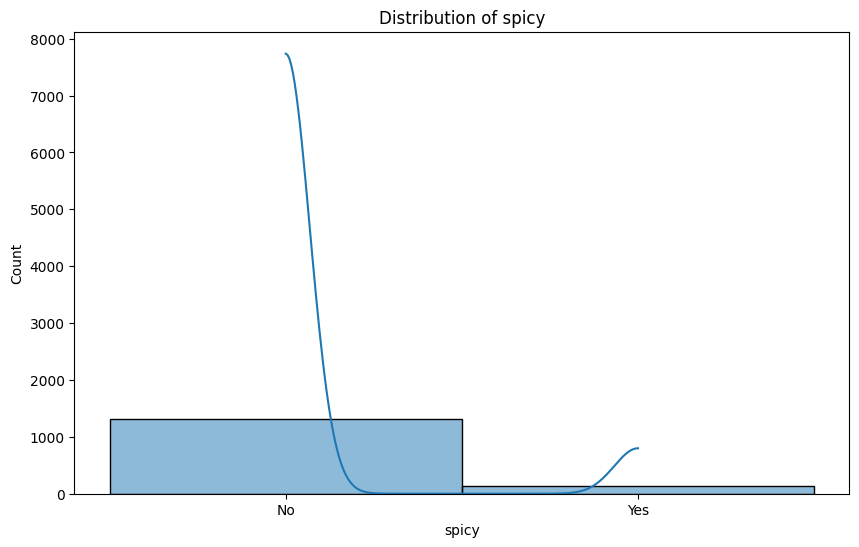

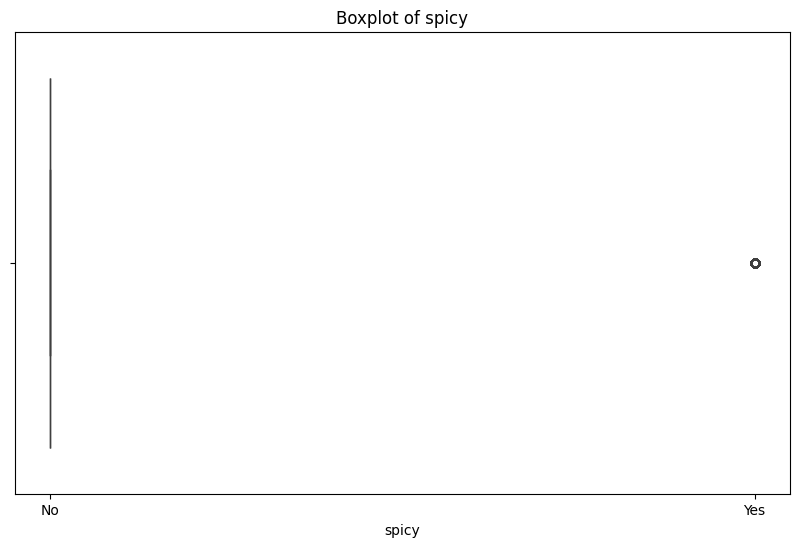

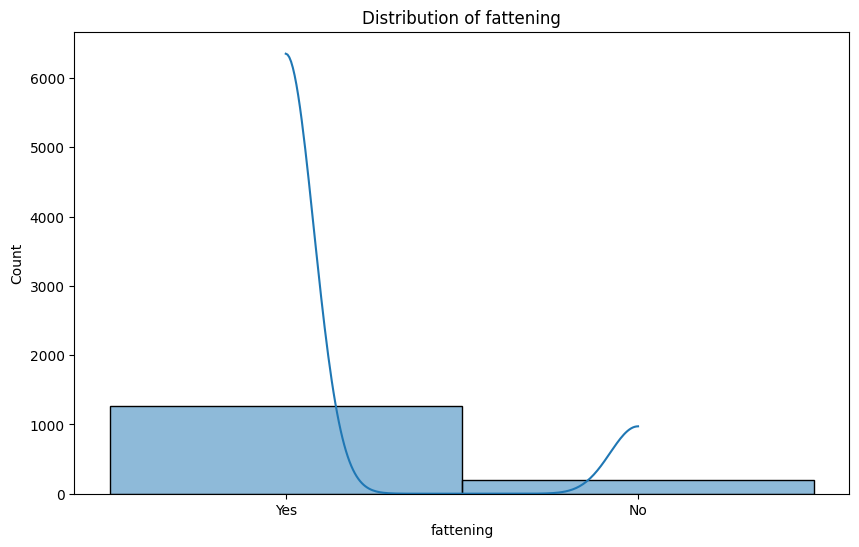

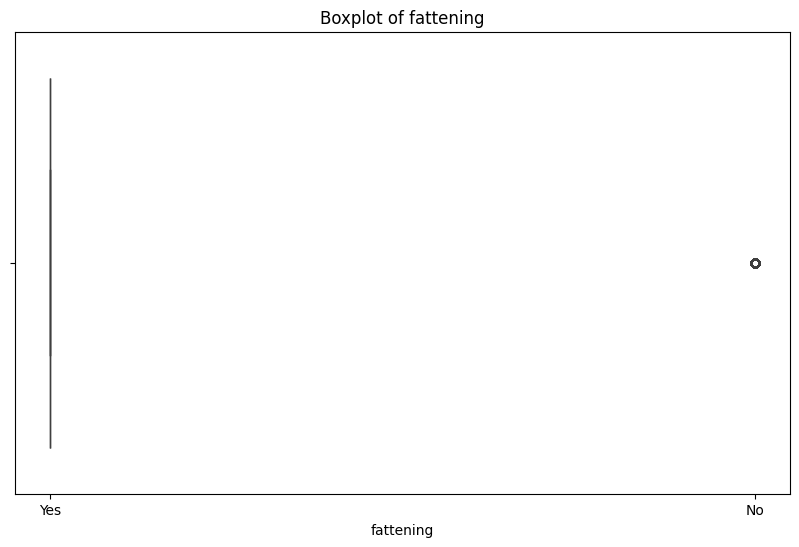

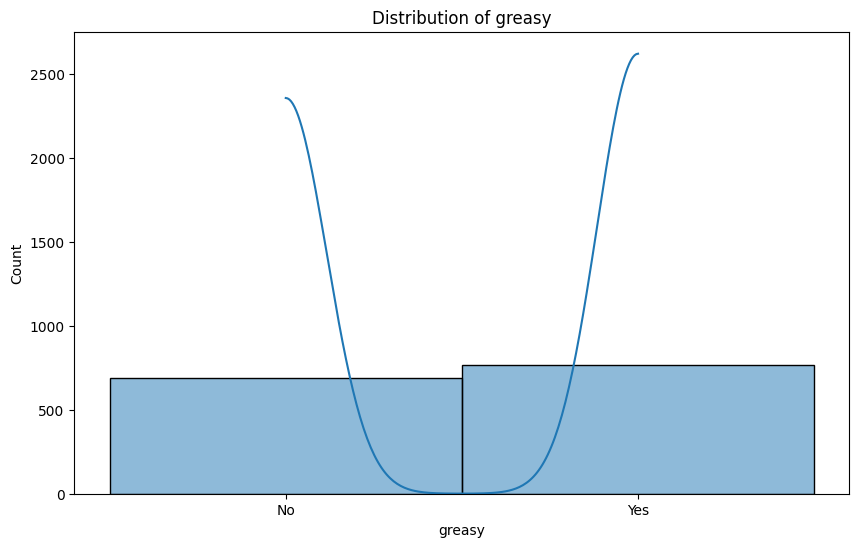

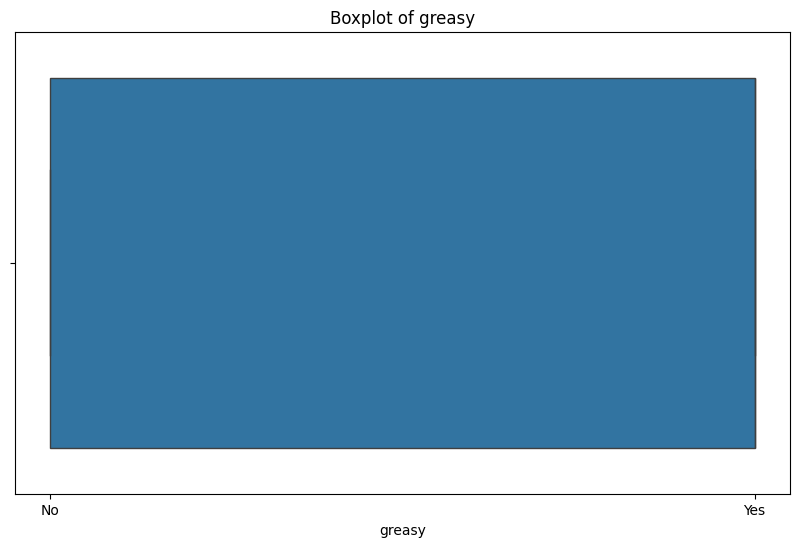

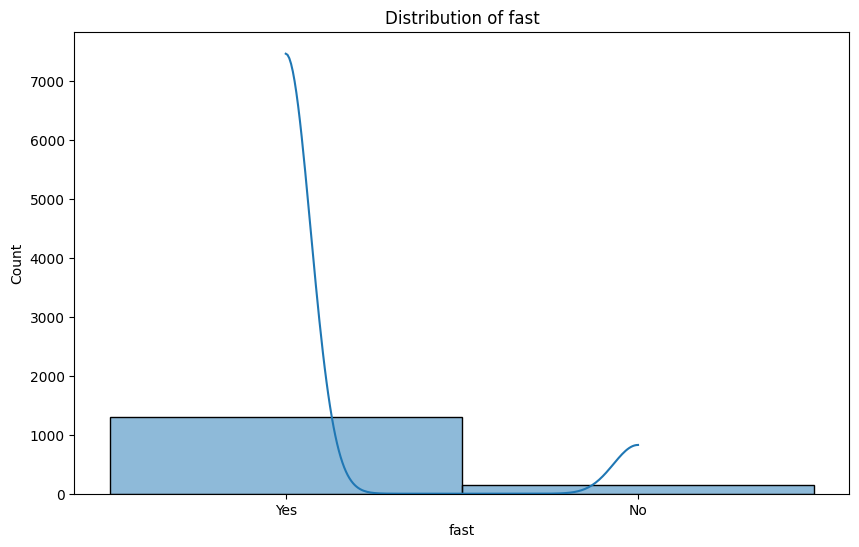

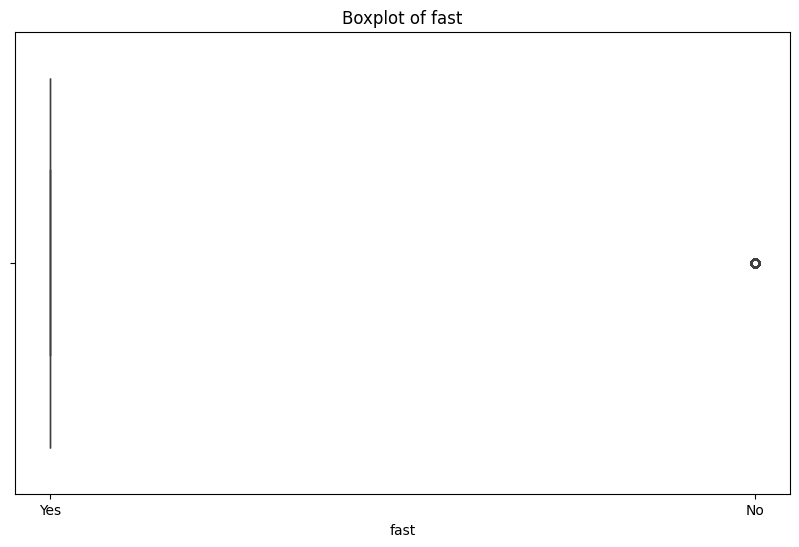

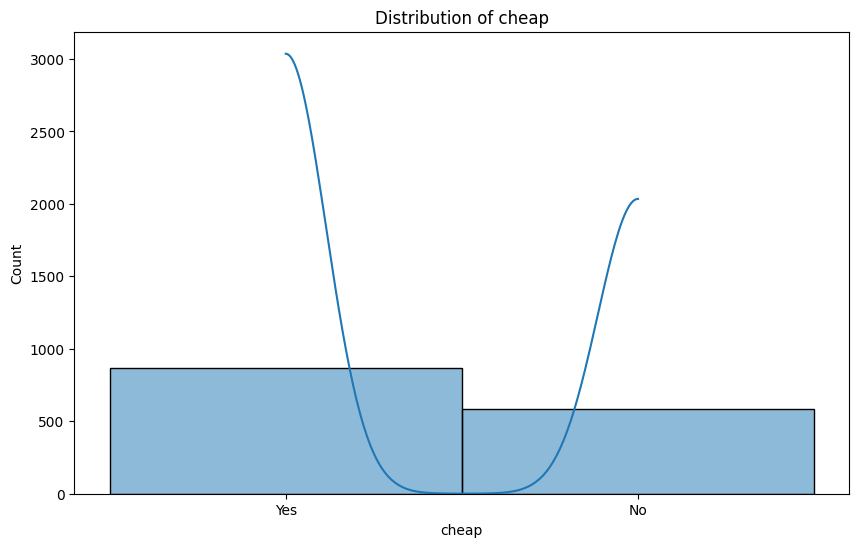

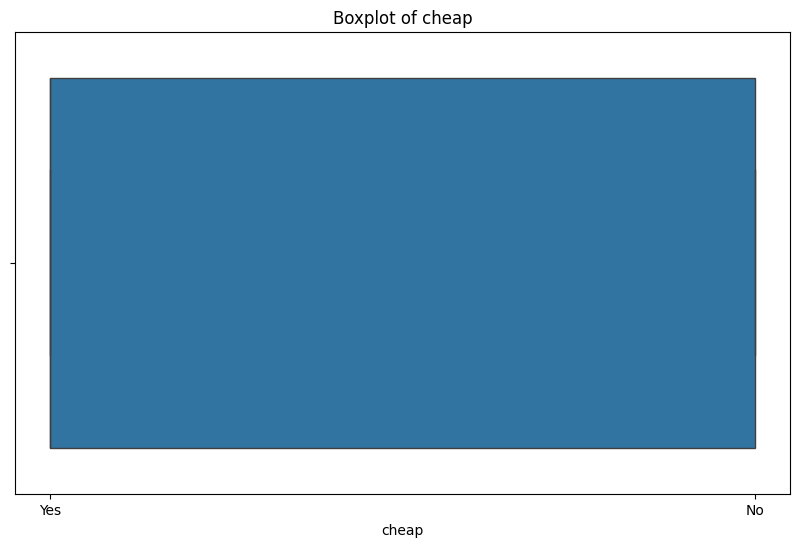

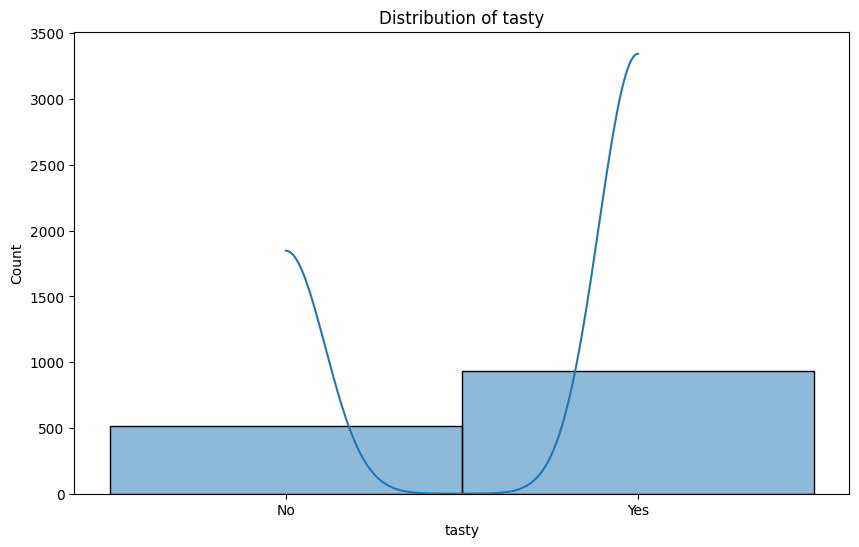

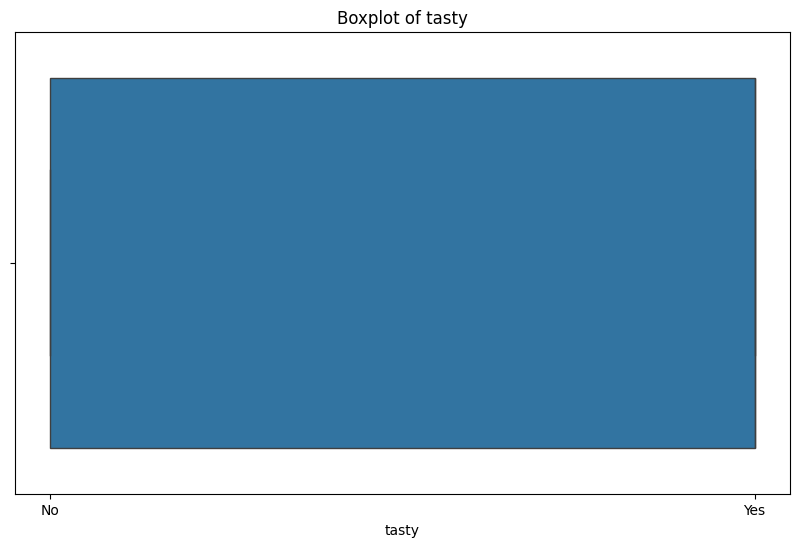

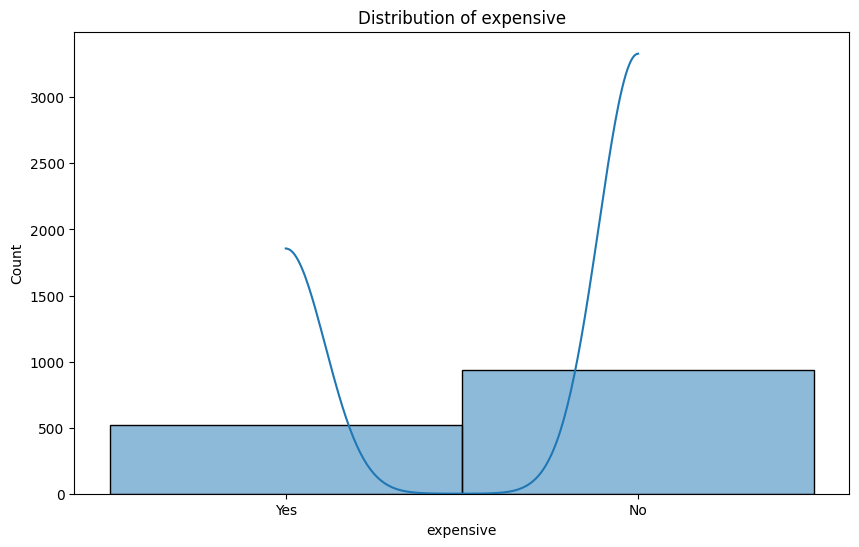

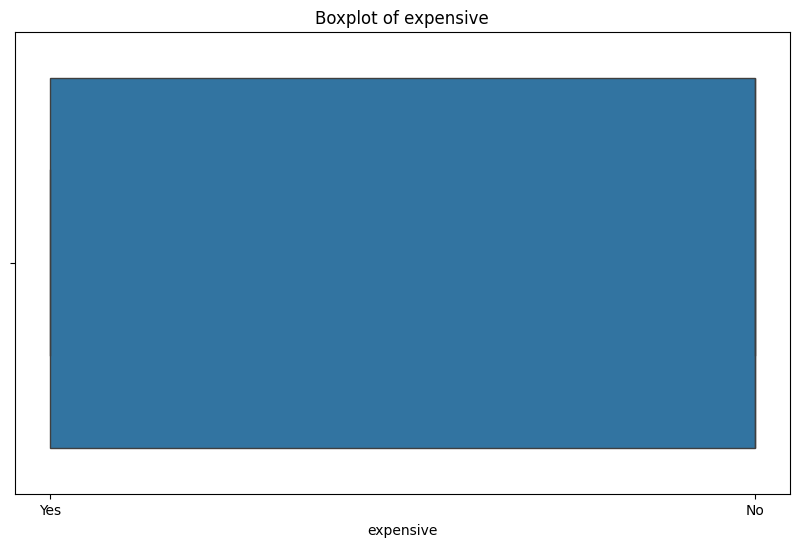

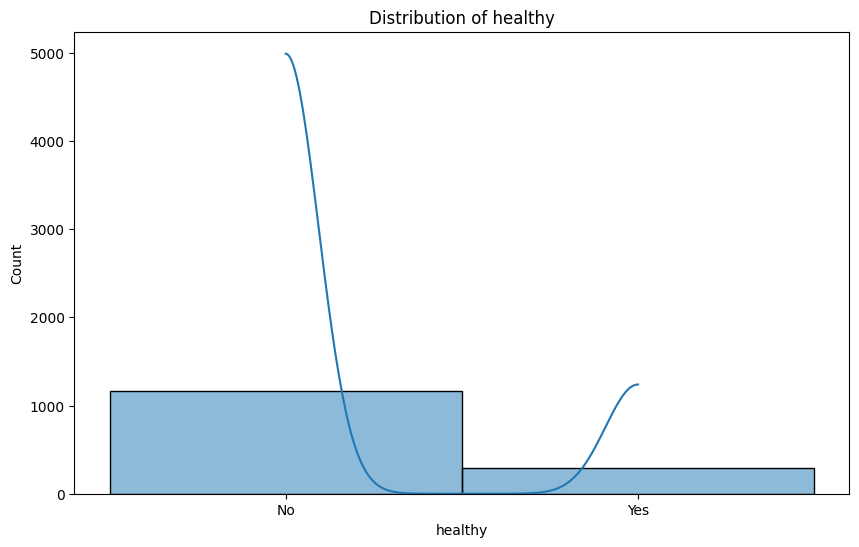

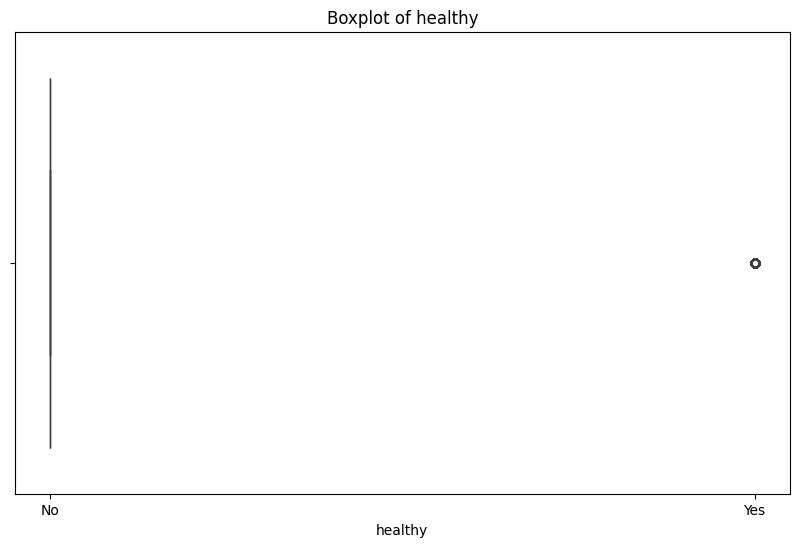

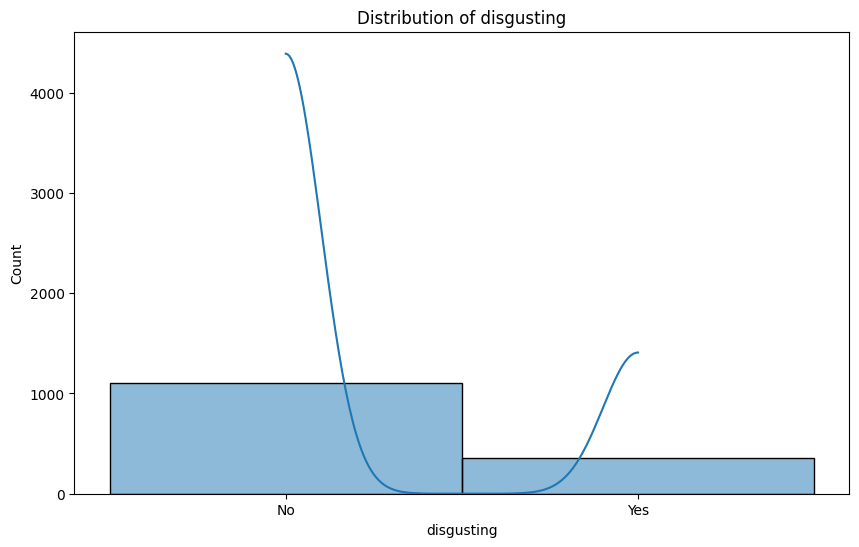

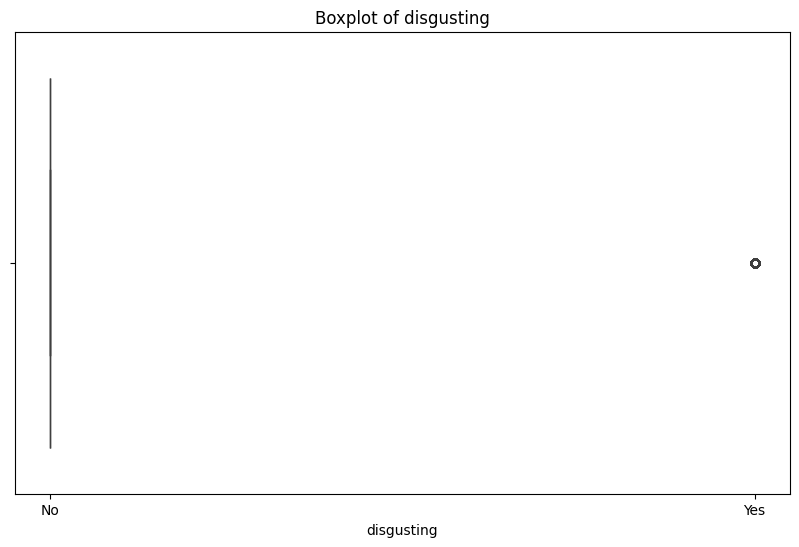

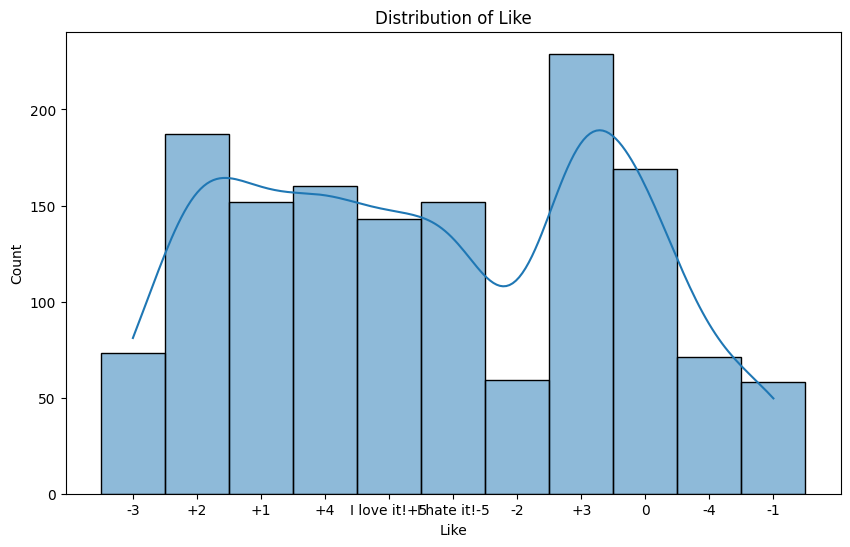

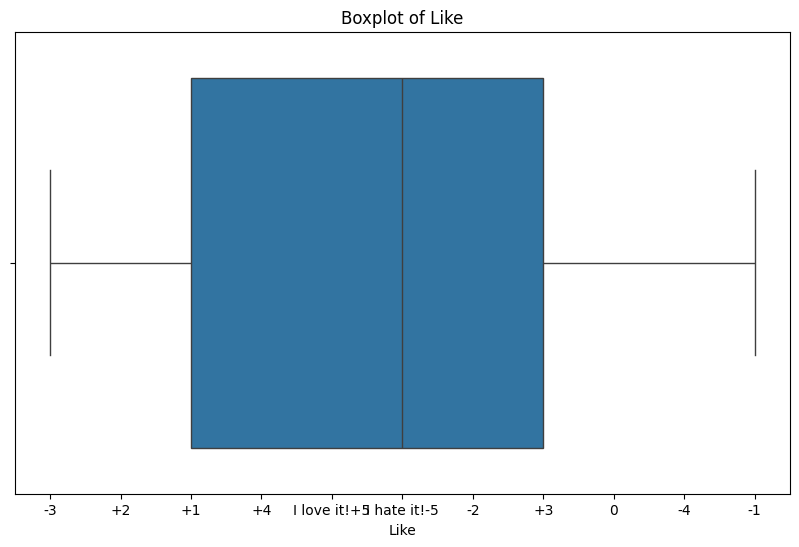

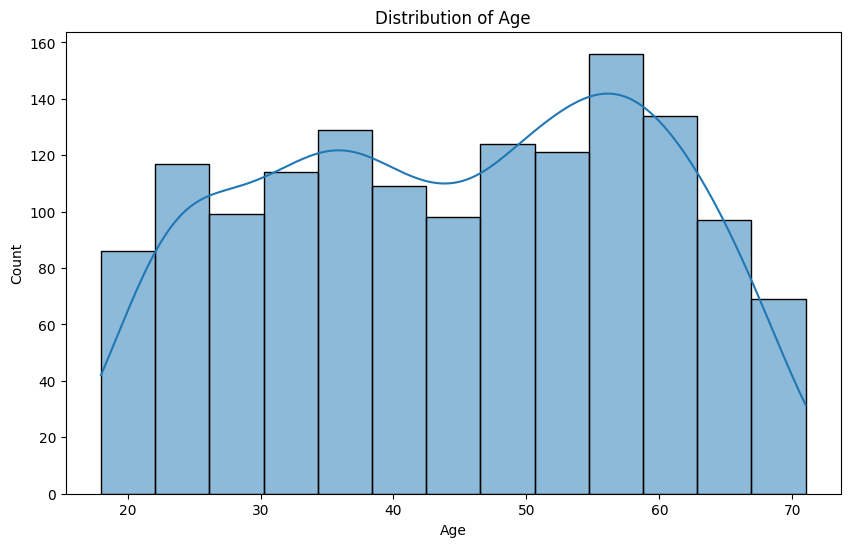

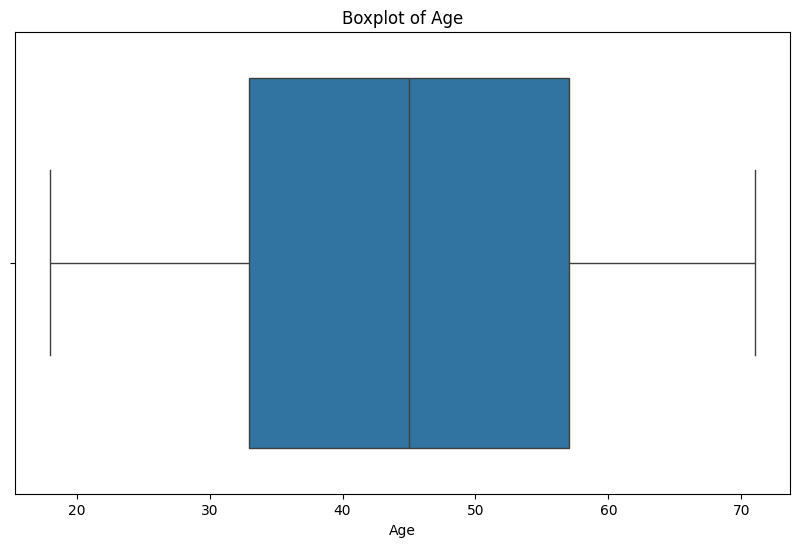

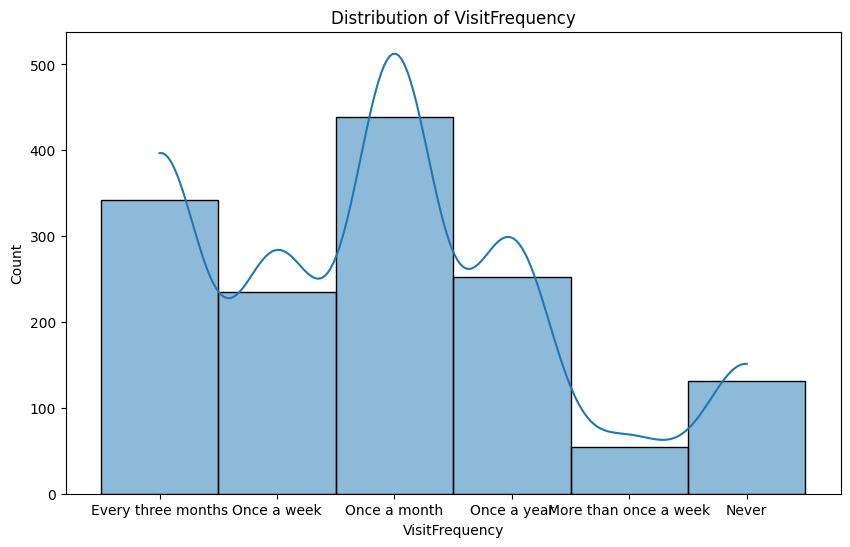

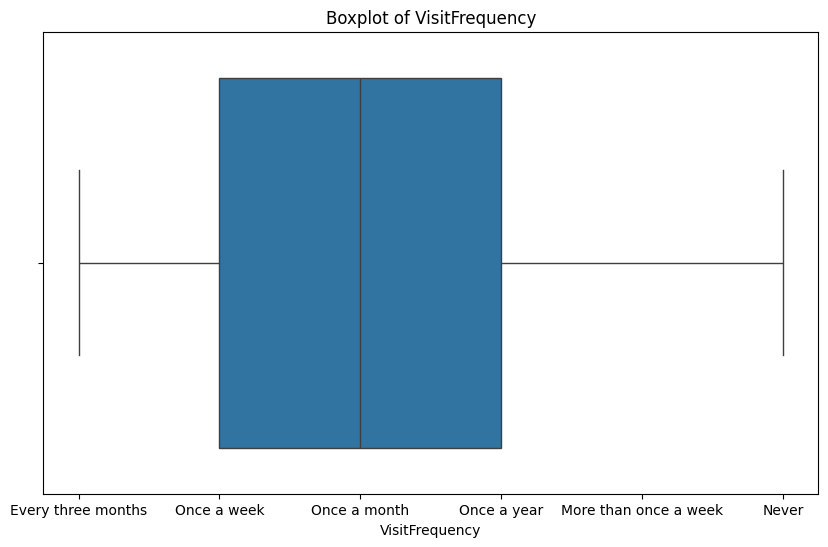

In [ ]:
metric_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency']

for var in metric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var)
    plt.title(f'Boxplot of {var}')
    plt.show()


In [ ]:

# High correlation between 'Like' and 'disgusting'
sns.scatterplot(data=df, x='Like', y='disgusting')
plt.title('Correlation between Like and Disgusting')
plt.show()

# High correlation between 'VisitFrequency' and 'yummy'
sns.scatterplot(data=df, x='VisitFrequency', y='yummy')
plt.title('Correlation between VisitFrequency and Yummy')
plt.show()

# High correlation between 'cheap' and 'expensive'
sns.scatterplot(data=df, x='cheap', y='expensive')
plt.title('Correlation between Cheap and Expensive')
plt.show()

# High correlation between 'disgusting' and 'Like'
sns.scatterplot(data=df, x='disgusting', y='Like')
plt.title('Correlation between Disgusting and Like')
plt.show()

# High correlation between 'expensive' and 'cheap'
sns.scatterplot(data=df, x='expensive', y='cheap')
plt.title('Correlation between Expensive and Cheap')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Example of Chi-square test for nominal variables
contingency_table = pd.crosstab(df['Like'], df['Gender'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test result for Gender: chi2={chi2}, p-value={p}')


Chi-square test result for Gender: chi2=10.469476947510914, p-value=0.4003132777143917


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data
X = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Age', 'VisitFrequency', 'Gender']]
y = df['Like']  # Assuming 'Like' is binary

# Convert categorical variable 'Gender' to numerical
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          +1       0.21      0.11      0.15        44
          +2       0.19      0.10      0.13        60
          +3       0.29      0.53      0.37        66
          +4       0.28      0.22      0.24        51
          -1       0.00      0.00      0.00        16
          -2       0.00      0.00      0.00        13
          -3       0.00      0.00      0.00        27
          -4       0.22      0.09      0.13        22
           0       0.16      0.27      0.20        45
I hate it!-5       0.53      0.84      0.65        55
I love it!+5       0.30      0.30      0.30        37

    accuracy                           0.29       436
   macro avg       0.20      0.22      0.20       436
weighted avg       0.24      0.29      0.25       436

[[ 5  3 16  5  0  1  0  1 11  1  1]
 [ 5  6 23  5  0  0  0  0 13  1  7]
 [ 1  6 35  9  0  0  0  0  8  0  7]
 [ 1  3 26 11  0  0  0  0  1  0  9]
 [ 1  2  1  0  0  0  2  1  8  1  0]
 [ 0  3

In [ ]:
# Train model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          +1       0.21      0.11      0.15        44
          +2       0.19      0.10      0.13        60
          +3       0.29      0.53      0.37        66
          +4       0.28      0.22      0.24        51
          -1       0.00      0.00      0.00        16
          -2       0.00      0.00      0.00        13
          -3       0.00      0.00      0.00        27
          -4       0.22      0.09      0.13        22
           0       0.16      0.27      0.20        45
I hate it!-5       0.53      0.84      0.65        55
I love it!+5       0.30      0.30      0.30        37

    accuracy                           0.29       436
   macro avg       0.20      0.22      0.20       436
weighted avg       0.24      0.29      0.25       436

[[ 5  3 16  5  0  1  0  1 11  1  1]
 [ 5  6 23  5  0  0  0  0 13  1  7]
 [ 1  6 35  9  0  0  0  0  8  0  7]
 [ 1  3 26 11  0  0  0  0  1  0  9]
 [ 1  2  1  0  0  0  2  1  8  1  0]
 [ 0  3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          +1       0.22      0.25      0.24        44
          +2       0.26      0.25      0.25        60
          +3       0.25      0.29      0.27        66
          +4       0.20      0.14      0.16        51
          -1       0.15      0.25      0.19        16
          -2       0.11      0.15      0.12        13
          -3       0.14      0.15      0.15        27
          -4       0.04      0.05      0.04        22
           0       0.16      0.16      0.16        45
I hate it!-5       0.56      0.42      0.48        55
I love it!+5       0.35      0.32      0.34        37

    accuracy                           0.24       436
   macro avg       0.22      0.22      0.22       436
weighted avg       0.26      0.24      0.25       436

[[11  6 10  5  1  0  2  2  5  1  1]
 [ 2 15 18  4  1  5  2  3  6  1  3]
 [ 8 11 19  9  3  2  3  0  4  0  7]
 [10  9 13  7  0  0  0  0  1  0 11]
 [ 1  1  0  0  4  2  3  2  2  1  0]
 [ 2  2